In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load experiment results
df = pd.read_csv('../results/bso_experiments.csv')
df = pd.read_csv('../results/test_bso.csv')
df = pd.read_csv('../results/bso_op_results.csv')
#df = pd.read_csv('../results/bso_simple_op_experiments.csv')

# Ensure parameters are treated as numeric
params = ['n_bees', 'max_steps', 'n_chance', 'max_iter', 'flip']
for p in params:
    df[p] = pd.to_numeric(df[p], errors='coerce')

# Unique benchmarks
graphs = df['graph'].unique()
print("Loaded data for graphs:", graphs)


Loaded data for graphs: ['test1.txt' 'test2.txt' 'test3.txt' 'test4.txt']


In [7]:
# Find best (lowest) fitness per graph (if tied take the one with the lowest conflicts if tied again take the one with the lowest colors)
best = {}
for g in graphs:
    # Filter for the current graph
    df_g = df[df['graph'] == g]
    
    # Find the best fitness
    best_fitness = df_g['fitness'].min()
    
    # Filter for the best fitness
    df_best = df_g[df_g['fitness'] == best_fitness]
    
    # If there are multiple, take the one with the lowest conflicts
    if len(df_best) > 1:
        best_conflicts = df_best['conflicts'].min()
        df_best = df_best[df_best['conflicts'] == best_conflicts]
        
        # If still tied, take the one with the lowest colors
        if len(df_best) > 1:
            best_colors = df_best['colors'].min()
            df_best = df_best[df_best['colors'] == best_colors]

            # If still tied thake the lowest runtime
            if len(df_best) > 1:
                best_runtime = df_best['runtime'].min()
                df_best = df_best[df_best['runtime'] == best_runtime]
    
    # Store the best parameters
    best[g] = df_best.iloc[0]
    #print(f"Best parameters for {g}: {best[g].to_dict()}")

# Create a DataFrame to store the best parameters for each graph
best_df = pd.DataFrame.from_dict(best, orient='index')
best_df.reset_index(drop=True, inplace=True)
best_df['graph'] = graphs
best_df = best_df[['graph'] + [col for col in best_df.columns if col != 'graph']]

best_df


,graph,seed,n_bees,max_steps,n_chance,max_iter,flip,fitness,conflicts,colors,runtime,solution
0,test1.txt,42,10,5,3,100,5,11,0,11,0.0156,[ 1 1 1 1 1 1 10 2 3 1 1 3 1 1 1 ...
1,test2.txt,42,20,5,1,100,5,70,0,70,33.2248,[39 27 9 13 17 46 3 32 45 13 32 21 56 66 63 ...
2,test3.txt,42,10,5,1,100,7,122,0,122,284.2919,[ 11 45 72 50 9 121 116 106 107 47 49 ...
3,test4.txt,42,50,5,5,100,3,144,0,144,71.2175,[ 15 44 91 62 7 56 8 26 10 27 89 ...


In [8]:
# a function that plots x by y for all graphs 
def plot_x_by_y(x, y):
    plt.figure()
    for g in graphs:
        sub = df[df['graph'] == g]
        agg = sub.groupby(x)[y].mean().sort_index()
        plt.plot(agg.index, agg.values, marker='o', label=g)
    plt.title(f'Mean {y} vs {x}')
    plt.xlabel(x)
    plt.ylabel(f'Mean {y}')
    plt.legend()
    plt.grid(True)
    plt.show()

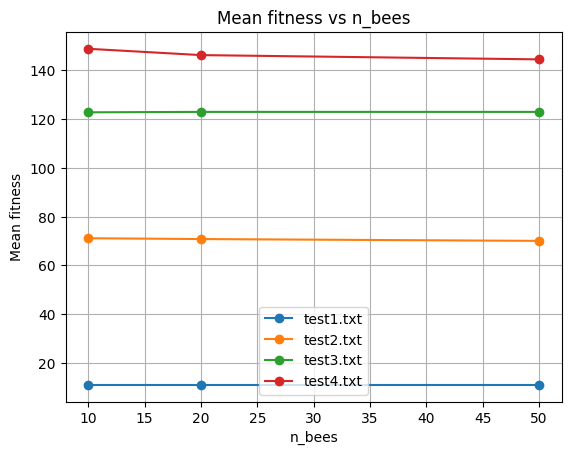

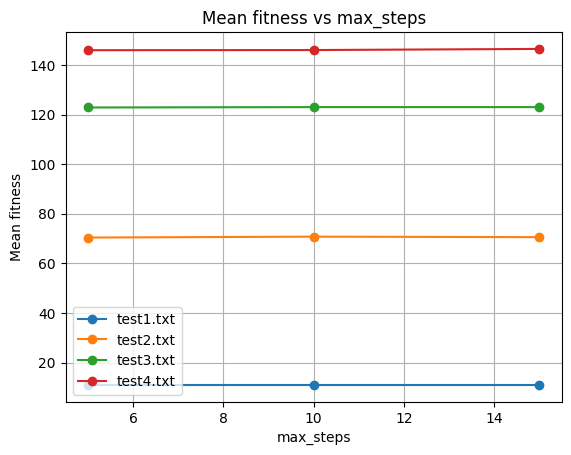

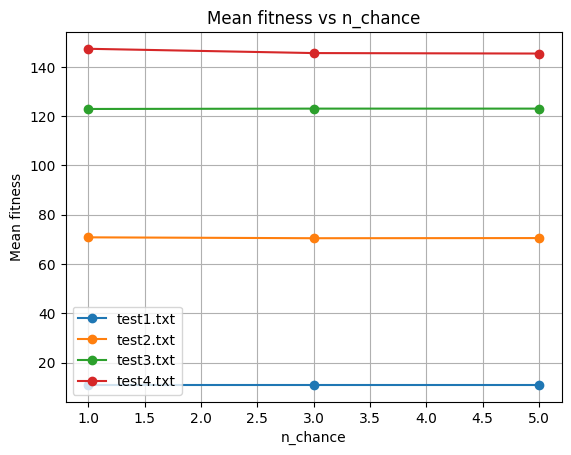

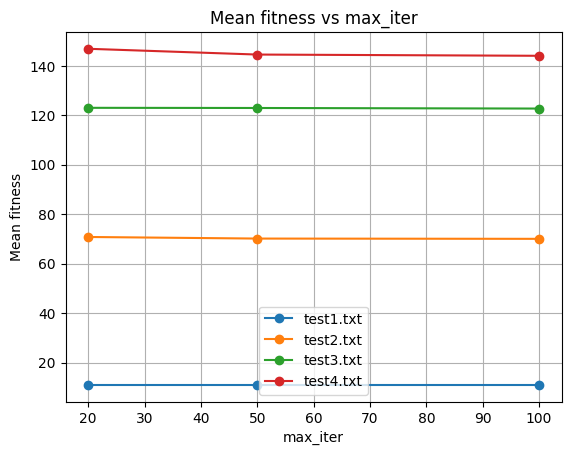

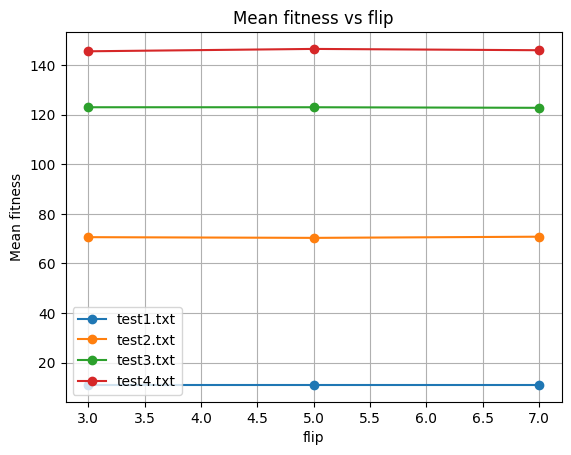

In [9]:
# Plot mean fitness vs each parameter, one chart per parameter
for p in params:
    plot_x_by_y(p, 'fitness')


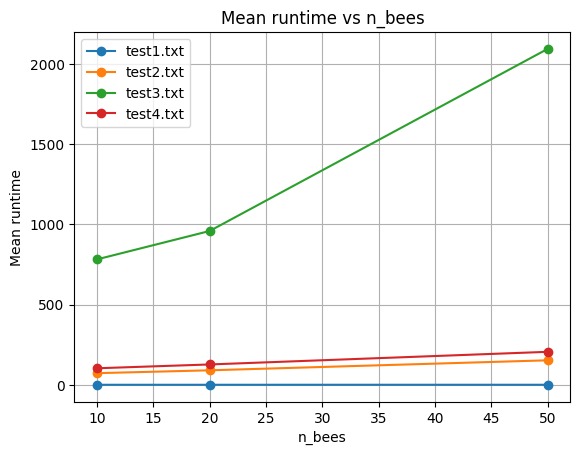

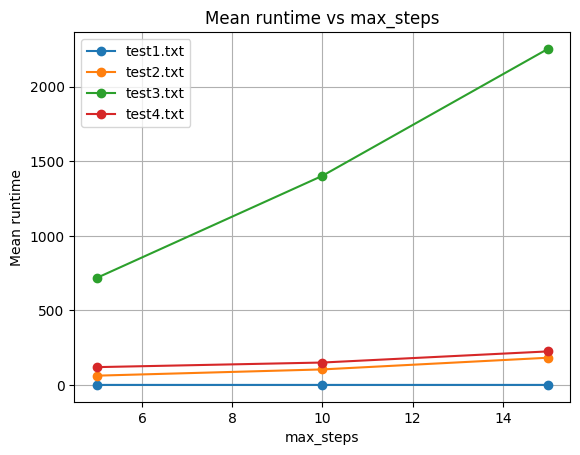

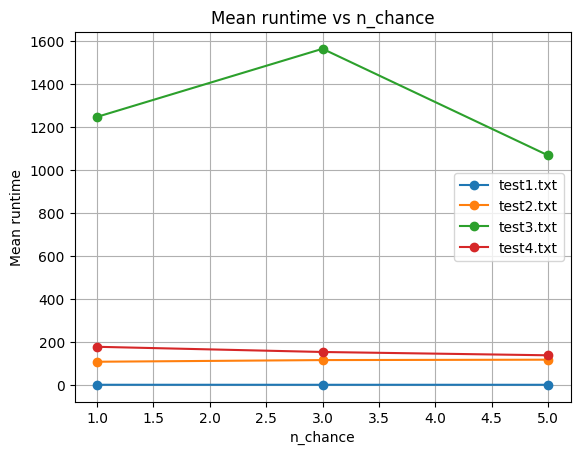

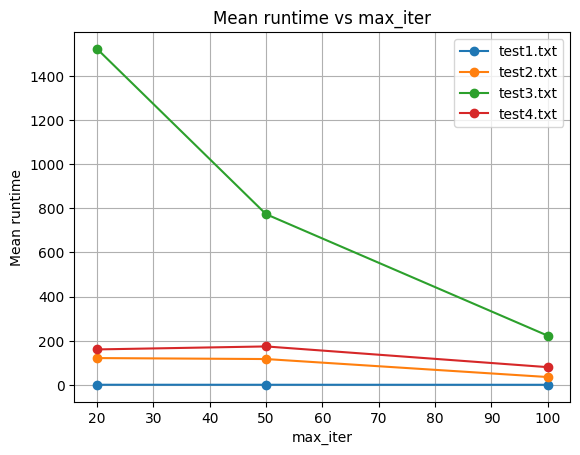

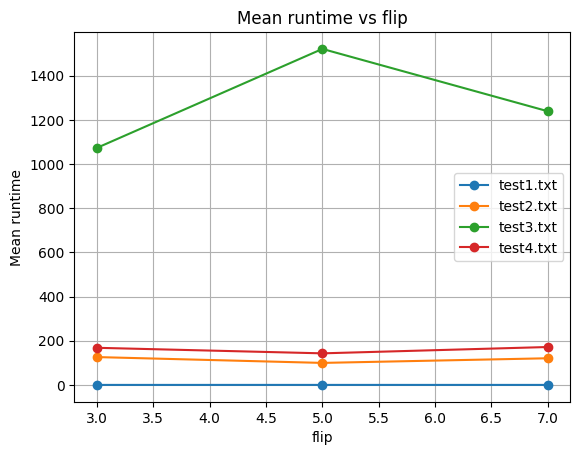

In [10]:
# Plot mean runtime vs each parameter, one chart per parameter
for p in params:
    plot_x_by_y(p, 'runtime')
